In [ ]:
# --- Configuración Inicial ---
# Importamos las bibliotecas esenciales para el análisis y la visualización.
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           
import numpy as np              

# Configuramos el estilo de las visualizaciones para que se vean mejor
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño de figura por defecto

In [ ]:
# --- PASO 1: Carga e Inspección Inicial de Datos ---

# Cargamos el archivo CSV en un DataFrame de pandas
file_path = 'https://drive.google.com/uc?export=download&id=1EZdevUjCF_18ts11cJju7UC349OR_20i'
df = pd.read_csv(file_path)

# 1.1. Vistazo rápido a las primeras filas
print("--- Primeras 5 filas del dataset: ---")
print(df.head())
print("\n")

# 1.2. Vistazo rápido a las últimas filas
print("--- Últimas 5 filas del dataset: ---")
print(df.tail())
print("\n")

# 1.3. Dimensiones del DataFrame (filas, columnas)
print(f"--- Dimensiones (filas, columnas): {df.shape} ---")
print("\n")

# 1.4. Información general: tipos de datos y valores no nulos
# 1. Cuántos datos no nulos hay por columna (para ver si faltan datos).
# 2. El tipo de dato (Dtype) de cada columna.
print("--- Información de Columnas (Dtypes y Nulos): ---")
df.info()

--- Primeras 5 filas del dataset: ---
   Product ID        Date  Store ID  Sales Quantity  Price Promotions  \
0        4277  2024-01-03        48             330  24.38         No   
1        5540  2024-04-29        10             334  74.98        Yes   
2        5406  2024-01-11        67             429  24.83        Yes   
3        5617  2024-04-04        17             298  13.41         No   
4        3480  2024-12-14        33             344  94.96        Yes   

  Seasonality Factors    External Factors Demand Trend Customer Segments  
0            Festival  Competitor Pricing   Increasing           Regular  
1             Holiday             Weather       Stable           Premium  
2             Holiday  Economic Indicator   Decreasing           Premium  
3                 NaN  Economic Indicator       Stable           Regular  
4            Festival             Weather   Increasing           Regular  


--- Últimas 5 filas del dataset: ---
      Product ID        Date  Stor

In [4]:
# --- PASO 2: Limpieza y Preprocesamiento de Datos ---

# 2.1. Verificación de valores nulos (Missing Values)
print("\n--- Conteo de Valores Nulos por Columna: ---")
print(df.isnull().sum())

# 2.2. Verificación de filas duplicadas
print(f"\n--- Cantidad de filas duplicadas: {df.duplicated().sum()} ---")

# 2.3. Corrección de Tipos de Datos
# Como vimos en df.info(), 'Date' debe ser convertida.
df['Date'] = pd.to_datetime(df['Date'])

# 2.4. Creación de nuevas características (Feature Engineering)
# Extraer mes, día de la semana, año puede ser útil para el análisis.
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek # 0 = Lunes, 6 = Domingo

print("\n--- df.info() después de la conversión de 'Date': ---")
df.info() # Verificamos que 'Date' ahora es datetime64[ns]


--- Conteo de Valores Nulos por Columna: ---
Product ID                0
Date                      0
Store ID                  0
Sales Quantity            0
Price                     0
Promotions                0
Seasonality Factors    3315
External Factors       2426
Demand Trend              0
Customer Segments         0
dtype: int64

--- Cantidad de filas duplicadas: 0 ---

--- df.info() después de la conversión de 'Date': ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product ID           10000 non-null  int64         
 1   Date                 10000 non-null  datetime64[ns]
 2   Store ID             10000 non-null  int64         
 3   Sales Quantity       10000 non-null  int64         
 4   Price                10000 non-null  float64       
 5   Promotions           10000 non-null  object        
 


--- Estadísticas Descriptivas de Variables Numéricas: ---
         Product ID      Store ID  Sales Quantity         Price     Year  \
count  10000.000000  10000.000000    10000.000000  10000.000000  10000.0   
mean    5533.521700     50.264900      248.728900     52.447878   2024.0   
std     2568.312468     28.656333      143.767452     27.459355      0.0   
min     1000.000000      1.000000        1.000000      5.000000   2024.0   
25%     3319.000000     26.000000      125.000000     28.480000   2024.0   
50%     5579.000000     50.000000      249.000000     52.330000   2024.0   
75%     7696.500000     75.000000      373.000000     76.252500   2024.0   
max     9998.000000     99.000000      499.000000     99.990000   2024.0   

              Month     DayOfWeek  
count  10000.000000  10000.000000  
mean       6.483600      2.983000  
std        3.433586      2.004573  
min        1.000000      0.000000  
25%        3.000000      1.000000  
50%        6.000000      3.000000  
75% 

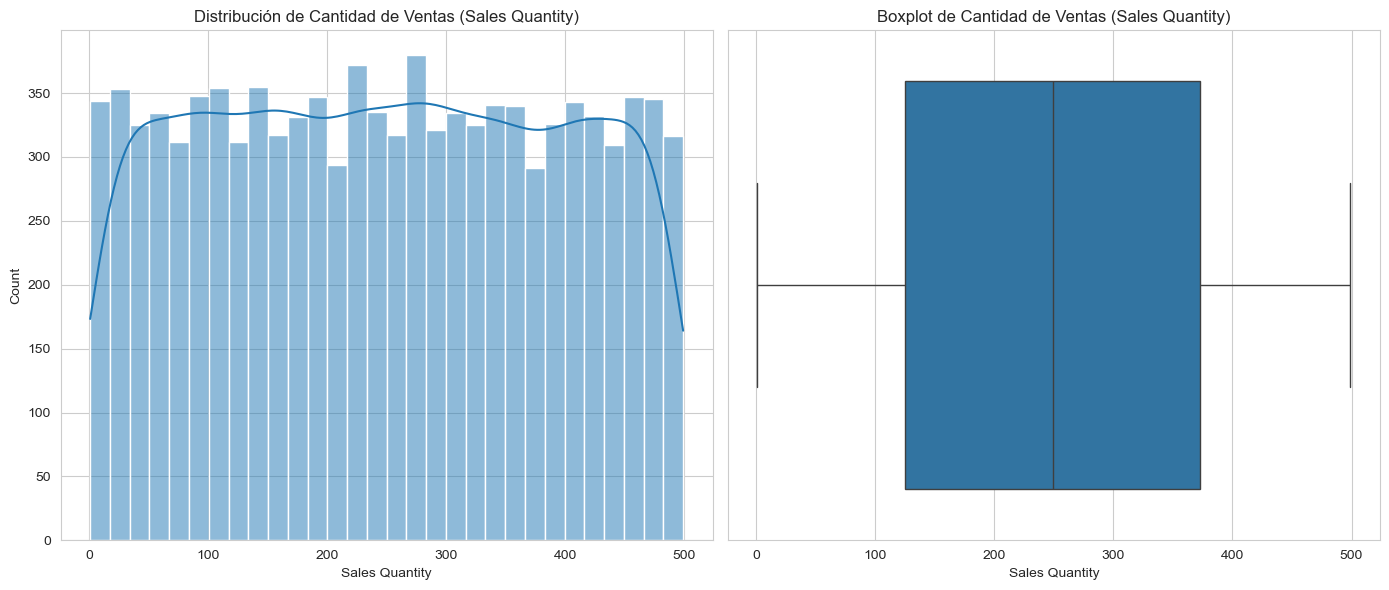

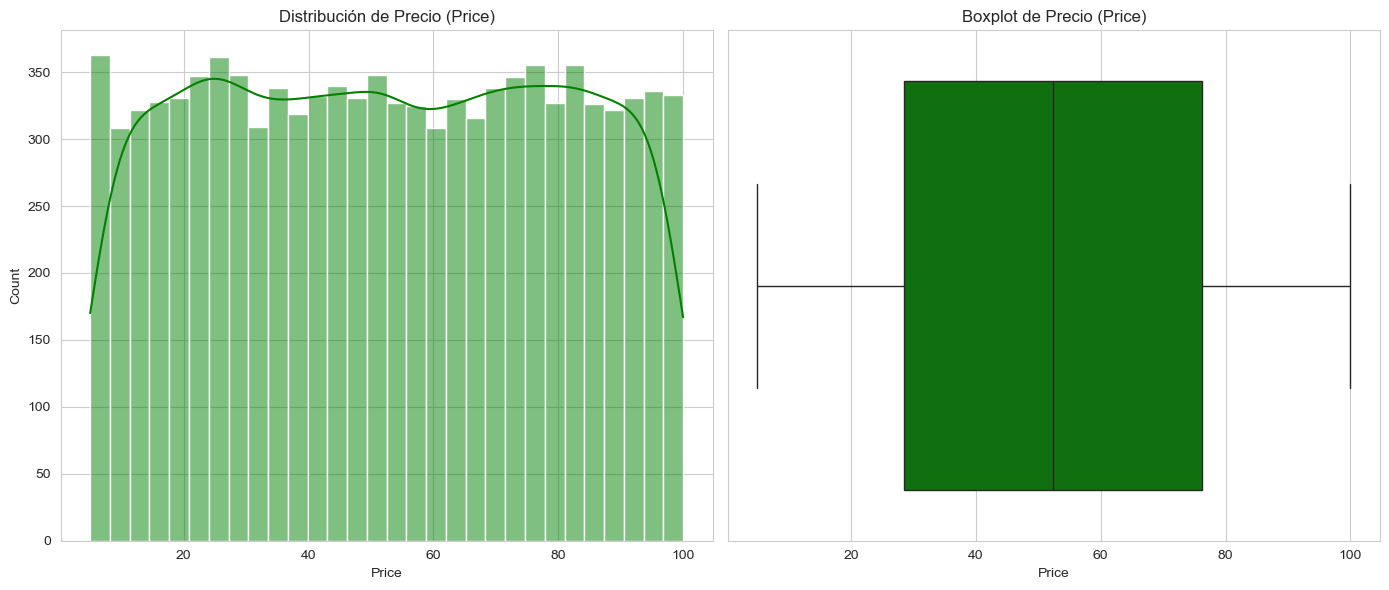


--- Conteo de Valores Únicos en Categóricas Clave: ---

Promotions:
Promotions
Yes    0.5023
No     0.4977
Name: proportion, dtype: float64

Customer Segments:
Customer Segments
Budget     3412
Regular    3328
Premium    3260
Name: count, dtype: int64

Demand Trend:
Demand Trend
Increasing    3387
Stable        3354
Decreasing    3259
Name: count, dtype: int64


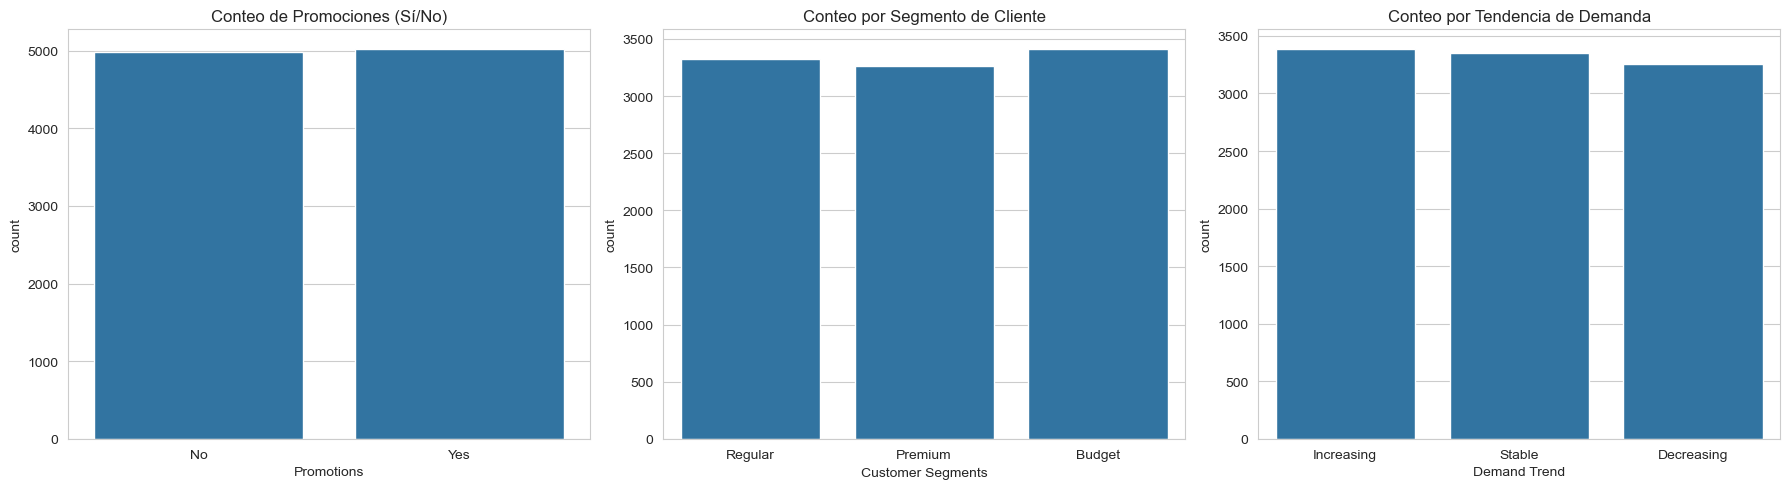

In [5]:
# --- PASO 3: Análisis Univariado (Análisis de una sola variable) ---
# El objetivo es entender la distribución de cada variable individualmente.

# 3.1. Variables Numéricas (Sales Quantity, Price)
print("\n--- Estadísticas Descriptivas de Variables Numéricas: ---")
# 'include=[np.number]' asegura que solo analicemos columnas numéricas
print(df.describe(include=[np.number]))

# 3.1.1. Distribución de 'Sales Quantity' (Variable Objetivo)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, gráfico 1
sns.histplot(df['Sales Quantity'], kde=True, bins=30)
plt.title('Distribución de Cantidad de Ventas (Sales Quantity)')

plt.subplot(1, 2, 2) # 1 fila, 2 columnas, gráfico 2
sns.boxplot(x=df['Sales Quantity'])
plt.title('Boxplot de Cantidad de Ventas (Sales Quantity)')
plt.tight_layout() # Ajusta los gráficos para que no se solapen
plt.show()

# 3.1.2. Distribución de 'Price'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, bins=30, color='green')
plt.title('Distribución de Precio (Price)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'], color='green')
plt.title('Boxplot de Precio (Price)')
plt.tight_layout()
plt.show()

# 3.2. Variables Categóricas
print("\n--- Conteo de Valores Únicos en Categóricas Clave: ---")

# 3.2.1. Promociones
print("\nPromotions:")
print(df['Promotions'].value_counts(normalize=True)) # normalize=True da porcentajes

# 3.2.2. Segmento de Cliente
print("\nCustomer Segments:")
print(df['Customer Segments'].value_counts())

# 3.2.3. Tendencia de Demanda
print("\nDemand Trend:")
print(df['Demand Trend'].value_counts())

# Visualización de las categorías más importantes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Promotions')
plt.title('Conteo de Promociones (Sí/No)')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Customer Segments')
plt.title('Conteo por Segmento de Cliente')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Demand Trend')
plt.title('Conteo por Tendencia de Demanda')
plt.tight_layout()
plt.show()


--- Matriz de Correlación: ---
                Sales Quantity     Price
Sales Quantity        1.000000 -0.006155
Price                -0.006155  1.000000


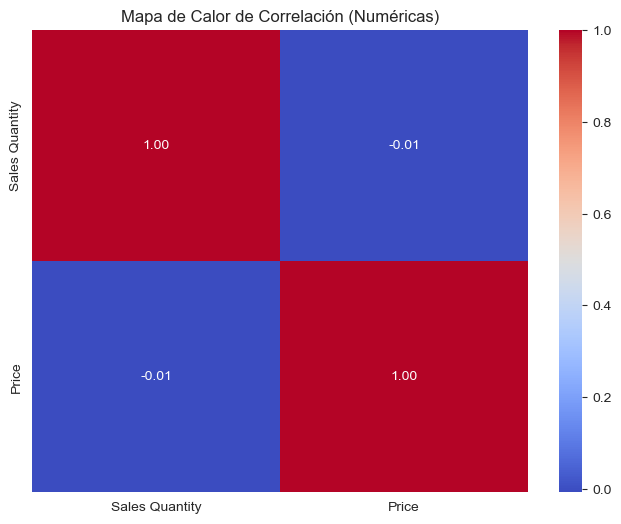

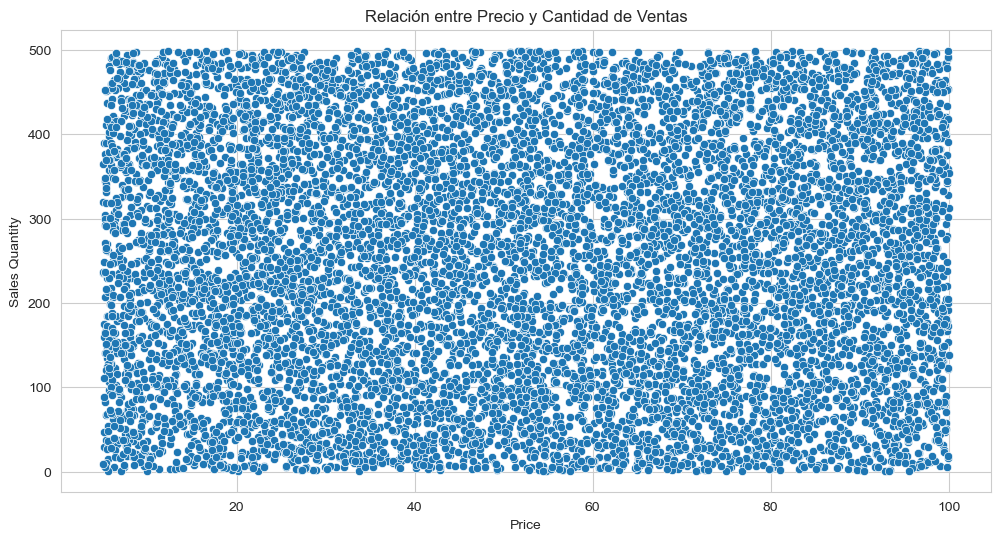

In [6]:
# --- PASO 4: Análisis Bivariado y Multivariado ---
# El objetivo es entender la relación ENTRE variables.

# 4.1. Relación entre Variables Numéricas (Correlación)
# ¿Cómo se relaciona el Precio con la Cantidad de Ventas?

# 4.1.1. Matriz de Correlación
# Seleccionamos solo las columnas numéricas originales
numerical_cols = ['Sales Quantity', 'Price']
correlation_matrix = df[numerical_cols].corr()

print("\n--- Matriz de Correlación: ---")
print(correlation_matrix)

# Visualización con un mapa de calor (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación (Numéricas)')
plt.show()

# 4.1.2. Scatter Plot (Gráfico de Dispersión)
sns.scatterplot(data=df, x='Price', y='Sales Quantity')
plt.title('Relación entre Precio y Cantidad de Ventas')
plt.show()


--- Media de Ventas por Promoción: ---
Promotions
No     247.022504
Yes    250.419670
Name: Sales Quantity, dtype: float64


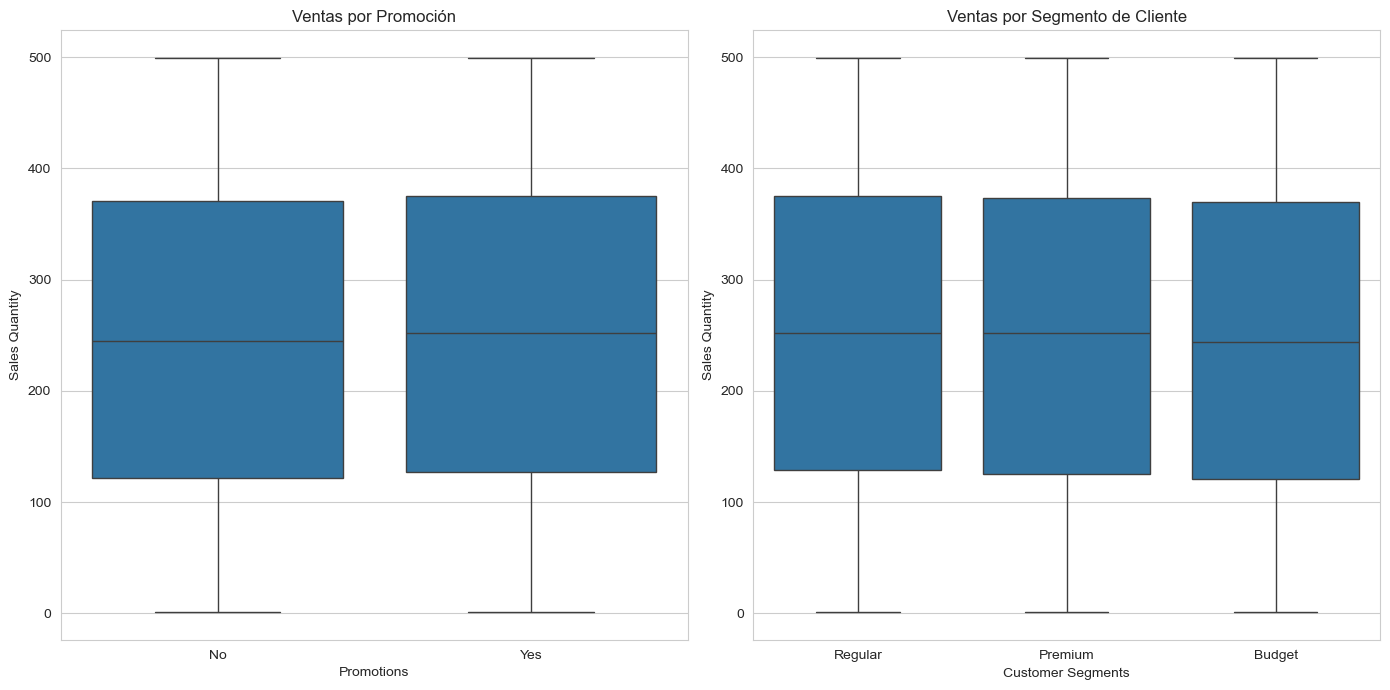


--- Media de Ventas por Segmento de Cliente: ---
Customer Segments
Budget     245.980070
Premium    249.693252
Regular    250.602464
Name: Sales Quantity, dtype: float64


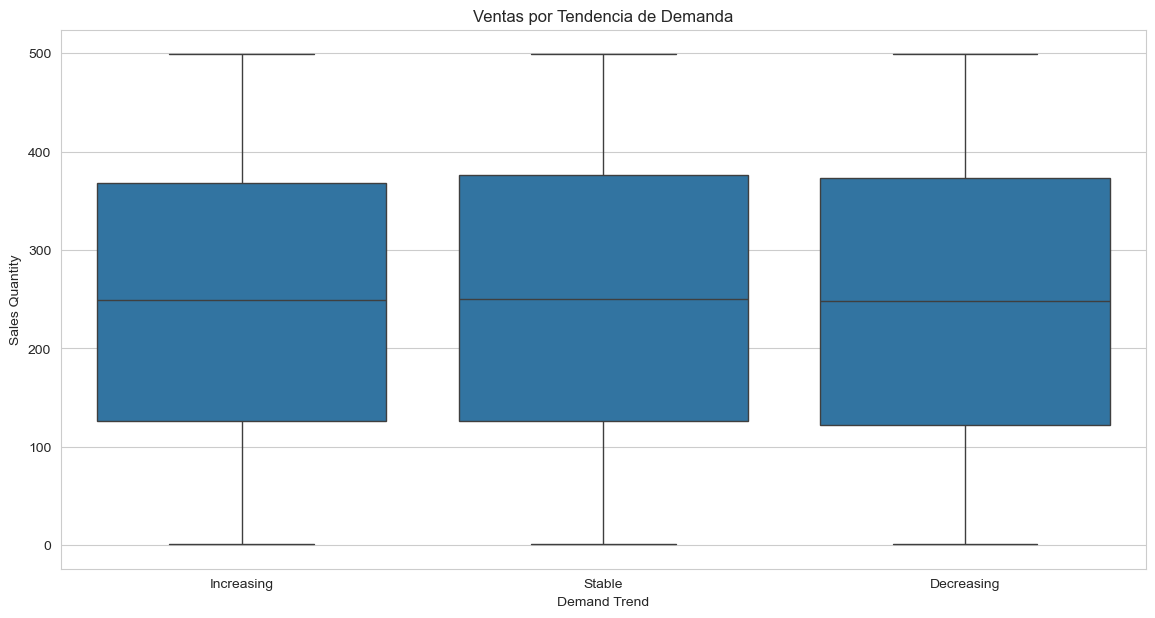


--- Media de Ventas por Tendencia de Demanda: ---
Demand Trend
Decreasing    247.577478
Increasing    248.906997
Stable        249.667859
Name: Sales Quantity, dtype: float64


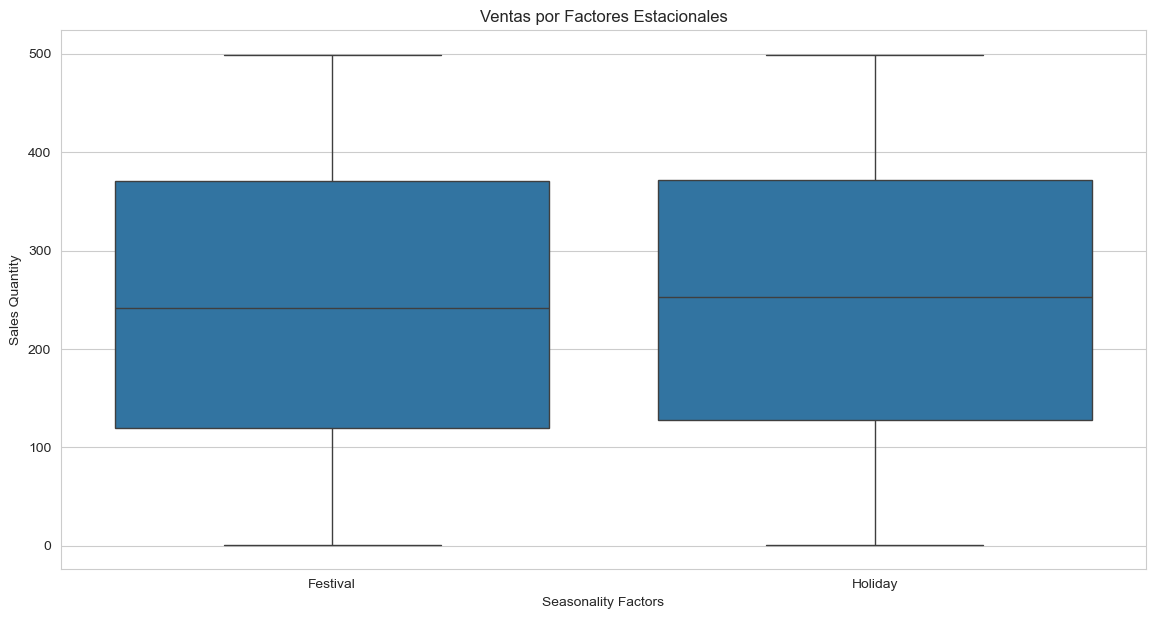

In [7]:
# 4.2. Relación entre Categóricas y Numéricas
# ¿Cómo afectan las promociones, segmentos, etc., a la cantidad de ventas?

# 4.2.1. Ventas vs. Promociones
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Promotions', y='Sales Quantity')
plt.title('Ventas por Promoción')

# Usamos groupby para ver los números exactos
print("\n--- Media de Ventas por Promoción: ---")
print(df.groupby('Promotions')['Sales Quantity'].mean())

# 4.2.2. Ventas vs. Segmento de Cliente
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Customer Segments', y='Sales Quantity')
plt.title('Ventas por Segmento de Cliente')
plt.tight_layout()
plt.show()

print("\n--- Media de Ventas por Segmento de Cliente: ---")
print(df.groupby('Customer Segments')['Sales Quantity'].mean())

# 4.2.3. Ventas vs. Tendencia de Demanda
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Demand Trend', y='Sales Quantity')
plt.title('Ventas por Tendencia de Demanda')
plt.show()

print("\n--- Media de Ventas por Tendencia de Demanda: ---")
print(df.groupby('Demand Trend')['Sales Quantity'].mean())

# 4.2.4. Ventas vs. Factores Estacionales
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Seasonality Factors', y='Sales Quantity')
plt.title('Ventas por Factores Estacionales')
plt.show()

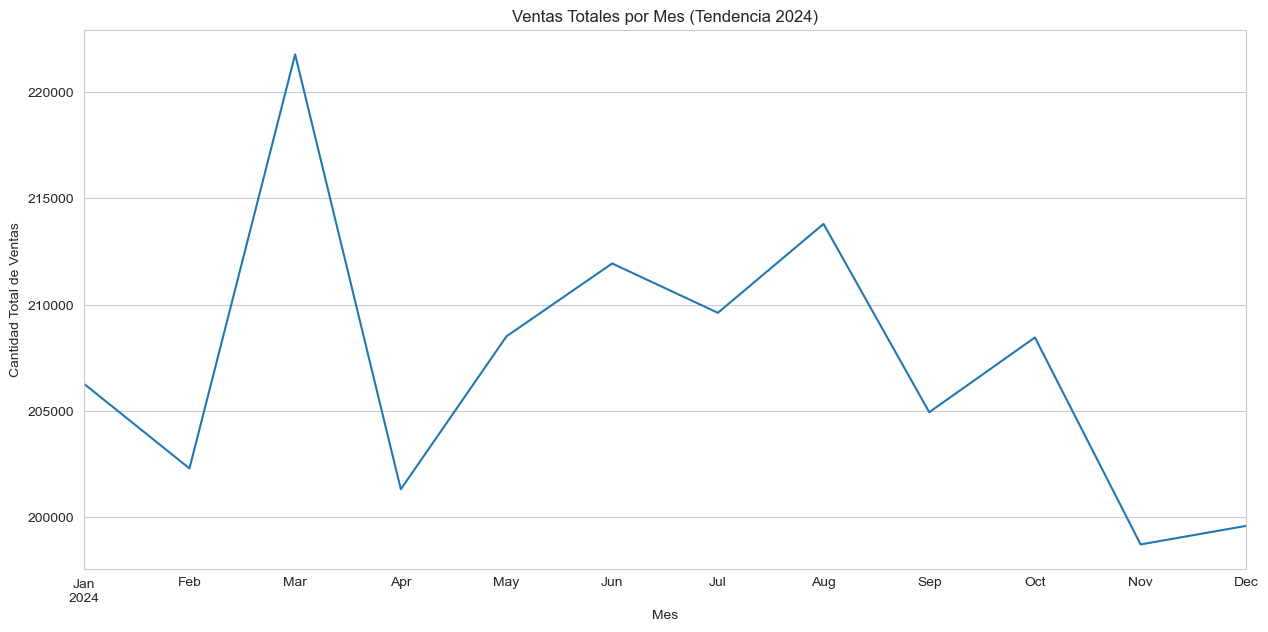


--- Media de Ventas por Día de la Semana: ---
DayOfWeekName
Lunes        248.440273
Martes       249.120222
Miércoles    245.157783
Jueves       249.122463
Viernes      252.046414
Sábado       250.695652
Domingo      246.462465
Name: Sales Quantity, dtype: float64


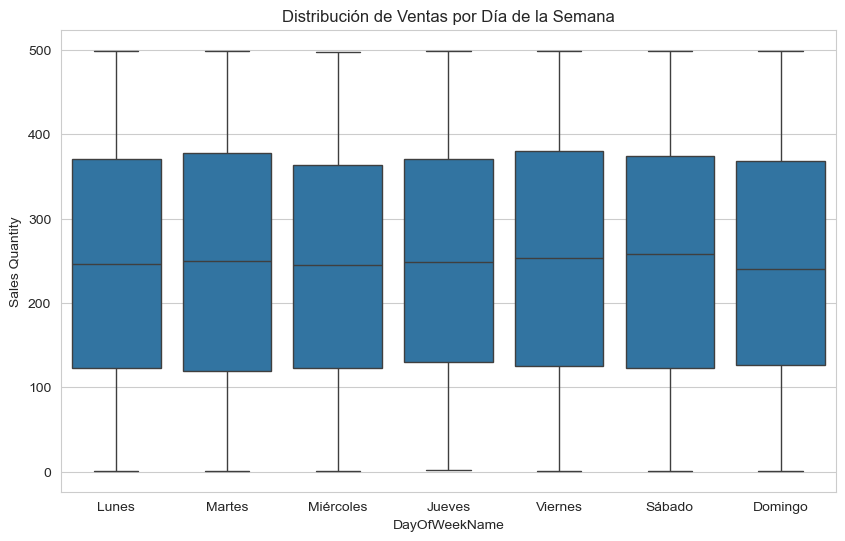

In [8]:
# --- PASO 5: Análisis de Series Temporales ---
# ¿Cómo evolucionan las ventas a lo largo del tiempo?

# 5.1. Establecer la fecha como índice del DataFrame
# Esto facilita el re-muestreo (resampling) y el ploteo temporal.
df_time = df.set_index('Date')

# 5.2. Re-muestreo de ventas por Mes
# Agrupamos las ventas por mes (sumándolas) para ver la tendencia general.
# 'M' significa 'Month End Frequency'
df_monthly_sales = df_time['Sales Quantity'].resample('ME').sum()

plt.figure(figsize=(15, 7))
df_monthly_sales.plot()
plt.title('Ventas Totales por Mes (Tendencia 2024)')
plt.ylabel('Cantidad Total de Ventas')
plt.xlabel('Mes')
plt.show()

# 5.3. Análisis de ventas por Día de la Semana
print("\n--- Media de Ventas por Día de la Semana: ---")
# 0 = Lunes, 6 = Domingo
day_map = {0:'Lunes', 1:'Martes', 2:'Miércoles', 3:'Jueves', 4:'Viernes', 5:'Sábado', 6:'Domingo'}
df['DayOfWeekName'] = df['DayOfWeek'].map(day_map)
print(df.groupby('DayOfWeekName')['Sales Quantity'].mean().reindex(day_map.values()))

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='DayOfWeekName', y='Sales Quantity', order=day_map.values())
plt.title('Distribución de Ventas por Día de la Semana')
plt.show()